<a href="https://colab.research.google.com/github/biffsocko/SUNY_Poly_NCS590/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  history= model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history=model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  # squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")


Defined build_model and train_model
Defined the plot_the_model and plot_the_loss_curve functions.


In [2]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/10
1/1 [==============================] - 1s 748ms/step - loss: 968.7222 - root_mean_squared_error: 31.1243
Epoch 2/10
1/1 [==============================] - 0s 17ms/step - loss: 967.0988 - root_mean_squared_error: 31.0982
Epoch 3/10
1/1 [==============================] - 0s 16ms/step - loss: 965.9224 - root_mean_squared_error: 31.0793
Epoch 4/10
1/1 [==============================] - 0s 15ms/step - loss: 964.9382 - root_mean_squared_error: 31.0635
Epoch 5/10
1/1 [==============================] - 0s 17ms/step - loss: 964.0650 - root_mean_squared_error: 31.0494
Epoch 6/10
1/1 [==============================] - 0s 10ms/step - loss: 963.2654 - root_mean_squared_error: 31.0365
Epoch 7/10
1/1 [==============================] - 0s 14ms/step - loss: 962.5182 - root_mean_squared_error: 31.0245
Epoch 8/10
1/1 [==============================] - 0s 17ms/step - loss: 961.8105 - root_mean_squared_error: 31.0131
Epoch 9/10
1/1 [==============================] - 0s 14ms/step - loss: 961.1334

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


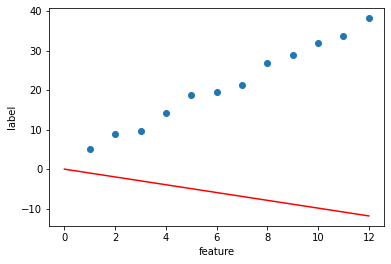

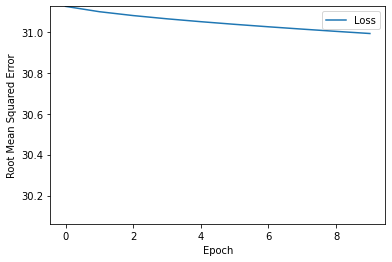

In [3]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/500
1/1 [==============================] - 0s 302ms/step - loss: 910.8298 - root_mean_squared_error: 30.1800
Epoch 2/500
1/1 [==============================] - 0s 13ms/step - loss: 909.2557 - root_mean_squared_error: 30.1539
Epoch 3/500
1/1 [==============================] - 0s 12ms/step - loss: 908.1152 - root_mean_squared_error: 30.1349
Epoch 4/500
1/1 [==============================] - 0s 10ms/step - loss: 907.1608 - root_mean_squared_error: 30.1191
Epoch 5/500
1/1 [==============================] - 0s 13ms/step - loss: 906.3143 - root_mean_squared_error: 30.1051
Epoch 6/500
1/1 [==============================] - 0s 14ms/step - loss: 905.5390 - root_mean_squared_error: 30.0922
Epoch 7/500
1/1 [==============================] - 0s 13ms/step - loss: 904.8146 - root_mean_squared_error: 30.0801
Epoch 8/500
1/1 [==============================] - 0s 10ms/step - loss: 904.1284 - root_mean_squared_error: 30.0687
Epoch 9/500
1/1 [==============================] - 0s 13ms/step - loss:

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


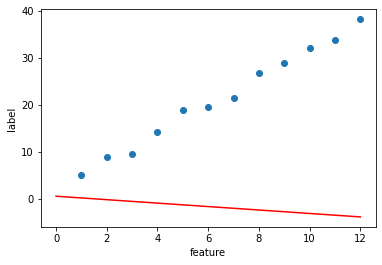

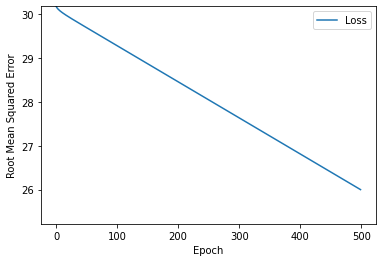

In [4]:
# Increase the learning rate and decrease the number of epochs.
learning_rate=10
epochs=500 
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/200
1/1 [==============================] - 0s 280ms/step - loss: 603.7340 - root_mean_squared_error: 24.5710
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 602.4527 - root_mean_squared_error: 24.5449
Epoch 3/200
1/1 [==============================] - 0s 15ms/step - loss: 601.5245 - root_mean_squared_error: 24.5260
Epoch 4/200
1/1 [==============================] - 0s 13ms/step - loss: 600.7480 - root_mean_squared_error: 24.5102
Epoch 5/200
1/1 [==============================] - 0s 12ms/step - loss: 600.0594 - root_mean_squared_error: 24.4961
Epoch 6/200
1/1 [==============================] - 0s 11ms/step - loss: 599.4288 - root_mean_squared_error: 24.4832
Epoch 7/200
1/1 [==============================] - 0s 13ms/step - loss: 598.8397 - root_mean_squared_error: 24.4712
Epoch 8/200
1/1 [==============================] - 0s 13ms/step - loss: 598.2816 - root_mean_squared_error: 24.4598
Epoch 9/200
1/1 [==============================] - 0s 13ms/step - loss:

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


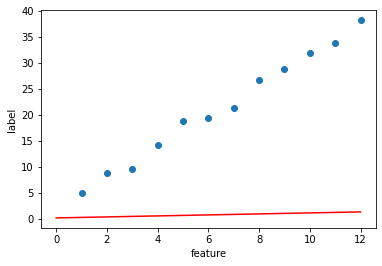

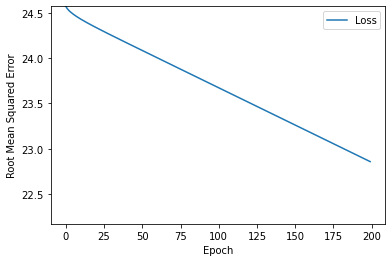

In [5]:
# Set the learning rate and number of epochs
learning_rate= 0.01  # Replace ? with a floating-point number
epochs= 200   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/2000
1/1 [==============================] - 0s 301ms/step - loss: 892.7347 - root_mean_squared_error: 29.8787
Epoch 2/2000
1/1 [==============================] - 0s 15ms/step - loss: 891.1763 - root_mean_squared_error: 29.8526
Epoch 3/2000
1/1 [==============================] - 0s 12ms/step - loss: 890.0471 - root_mean_squared_error: 29.8337
Epoch 4/2000
1/1 [==============================] - 0s 14ms/step - loss: 889.1024 - root_mean_squared_error: 29.8178
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 888.2643 - root_mean_squared_error: 29.8038
Epoch 6/2000
1/1 [==============================] - 0s 13ms/step - loss: 887.4968 - root_mean_squared_error: 29.7909
Epoch 7/2000
1/1 [==============================] - 0s 13ms/step - loss: 886.7796 - root_mean_squared_error: 29.7788
Epoch 8/2000
1/1 [==============================] - 0s 14ms/step - loss: 886.1003 - root_mean_squared_error: 29.7674
Epoch 9/2000
1/1 [==============================] - 0s 14ms/ste

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


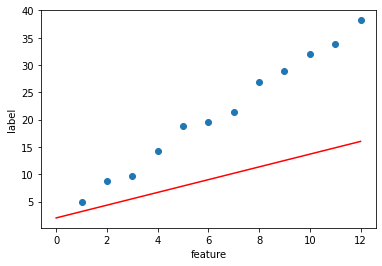

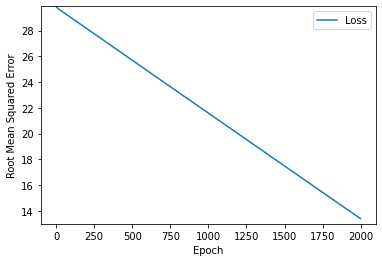

In [6]:
# Set the learning rate and number of epochs
learning_rate= 0.01  # Replace ? with a floating-point number
epochs= 2000   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/400
1/1 [==============================] - 0s 319ms/step - loss: 408.9190 - root_mean_squared_error: 20.2217
Epoch 2/400
1/1 [==============================] - 0s 11ms/step - loss: 407.8649 - root_mean_squared_error: 20.1957
Epoch 3/400
1/1 [==============================] - 0s 12ms/step - loss: 407.1015 - root_mean_squared_error: 20.1768
Epoch 4/400
1/1 [==============================] - 0s 12ms/step - loss: 406.4630 - root_mean_squared_error: 20.1609
Epoch 5/400
1/1 [==============================] - 0s 12ms/step - loss: 405.8969 - root_mean_squared_error: 20.1469
Epoch 6/400
1/1 [==============================] - 0s 11ms/step - loss: 405.3786 - root_mean_squared_error: 20.1340
Epoch 7/400
1/1 [==============================] - 0s 12ms/step - loss: 404.8943 - root_mean_squared_error: 20.1220
Epoch 8/400
1/1 [==============================] - 0s 14ms/step - loss: 404.4358 - root_mean_squared_error: 20.1106
Epoch 9/400
1/1 [==============================] - 0s 16ms/step - loss:

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


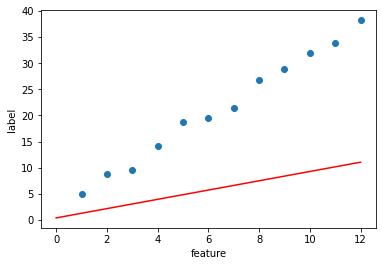

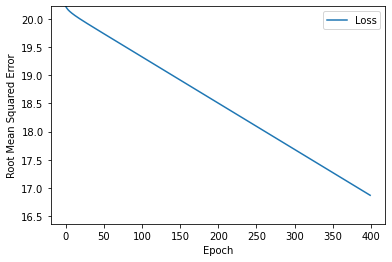

In [7]:
# Set the learning rate and number of epochs
learning_rate= 0.01  # Replace ? with a floating-point number
epochs= 400   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/400
1/1 [==============================] - 0s 295ms/step - loss: 624.6100 - root_mean_squared_error: 24.9922
Epoch 2/400
1/1 [==============================] - 0s 10ms/step - loss: 623.3067 - root_mean_squared_error: 24.9661
Epoch 3/400
1/1 [==============================] - 0s 11ms/step - loss: 622.3625 - root_mean_squared_error: 24.9472
Epoch 4/400
1/1 [==============================] - 0s 14ms/step - loss: 621.5728 - root_mean_squared_error: 24.9314
Epoch 5/400
1/1 [==============================] - 0s 13ms/step - loss: 620.8723 - root_mean_squared_error: 24.9173
Epoch 6/400
1/1 [==============================] - 0s 13ms/step - loss: 620.2307 - root_mean_squared_error: 24.9044
Epoch 7/400
1/1 [==============================] - 0s 10ms/step - loss: 619.6314 - root_mean_squared_error: 24.8924
Epoch 8/400
1/1 [==============================] - 0s 13ms/step - loss: 619.0638 - root_mean_squared_error: 24.8810
Epoch 9/400
1/1 [==============================] - 0s 12ms/step - loss:

/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


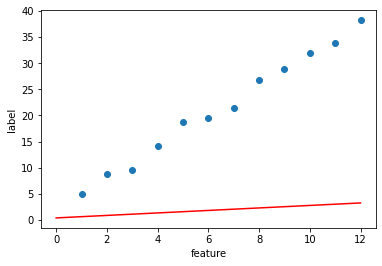

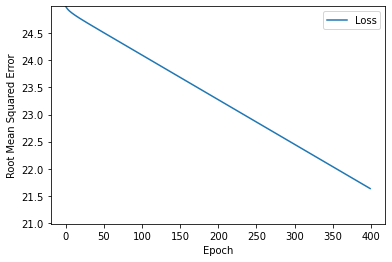

In [8]:
# Set the learning rate and number of epochs
learning_rate= 100  # Replace ? with a floating-point number
epochs= 400   # Replace ? with an integer

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)